# Exploratory Analysis Exercisess

#### - Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

#### - For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date.

#### - For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.ion()


import acquire
import prepare

In [4]:
df = acquire.combine_sales_stores_items_data()

In [5]:
df.head()

,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,35200264013,35200264013
3,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,35200264013,35200264013
4,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1.0,Riceland American Jazmine Rice,0.84,35200264013,35200264013


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913000 entries, 0 to 912999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   item           913000 non-null  int64  
 1   sale_amount    913000 non-null  float64
 2   sale_date      913000 non-null  object 
 3   sale_id        913000 non-null  int64  
 4   store          913000 non-null  int64  
 5   store_address  913000 non-null  object 
 6   store_city     913000 non-null  object 
 7   store_id       913000 non-null  int64  
 8   store_state    913000 non-null  object 
 9   store_zipcode  913000 non-null  object 
 10  item_brand     365200 non-null  object 
 11  item_id        365200 non-null  float64
 12  item_name      365200 non-null  object 
 13  item_price     365200 non-null  float64
 14  item_upc12     365200 non-null  object 
 15  item_upc14     365200 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 118.4+ MB


In [7]:
# Reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date)

In [8]:
#Set the index, and sort so we can ensure that its in chronological order.
df = df.set_index('sale_date').sort_index()

In [10]:
# minimum date? maximum date?
# Is this correct?
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00+0000', tz='UTC'),
 Timestamp('2017-12-31 00:00:00+0000', tz='UTC'))

### Train Test Split¶
- Test will be last year of data
- Train will be all data before last year of data

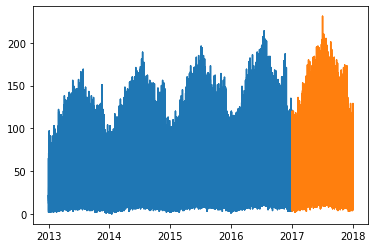

In [16]:
train = df.loc[:'2016'] # includes 2016
test = df.loc['2017']

plt.plot(train.index, train.sale_amount)
plt.plot(test.index, test.sale_amount)

In [17]:
train.shape, test.shape

((730500, 15), (182500, 15))

In [18]:
#For ease of use, renaming sale_amount to y
y = train.sale_amount
y.head()

sale_date
2013-01-01 00:00:00+00:00    13.0
2013-01-01 00:00:00+00:00    26.0
2013-01-01 00:00:00+00:00    27.0
2013-01-01 00:00:00+00:00    54.0
2013-01-01 00:00:00+00:00    35.0
Name: sale_amount, dtype: float64

<AxesSubplot:ylabel='Frequency'>

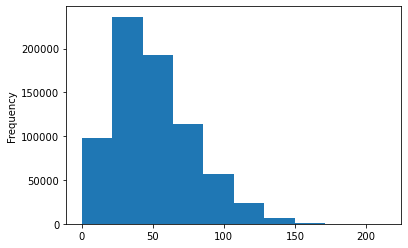

In [19]:
#histogram to show the distribution of our target variable
y.plot.hist()

[Text(0.5, 1.0, 'Average Sales by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Sale Amount')]

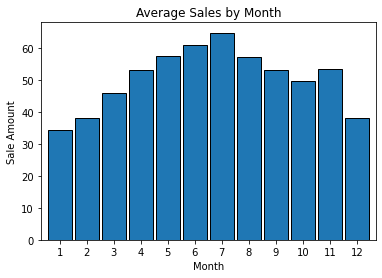

In [20]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Month', xlabel='Month', ylabel='Sale Amount')

[Text(0.5, 1.0, 'Average Sales by Weekday'),
 Text(0.5, 17.200000000000003, 'Weekday'),
 Text(17.200000000000003, 0.5, 'Sales Amount')]

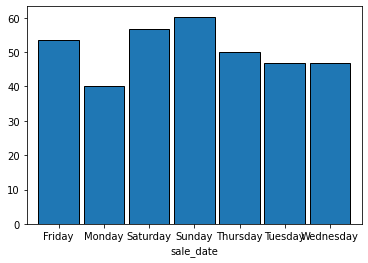

In [21]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Sales by Weekday', xlabel='Weekday', ylabel='Sales Amount')

<AxesSubplot:xlabel='sale_date'>

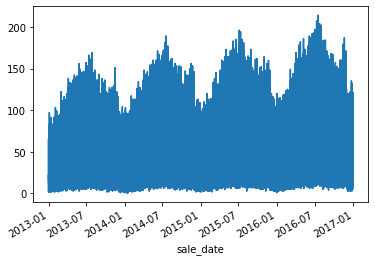

In [22]:
y.plot()

<AxesSubplot:title={'center':'Monthly average'}, xlabel='sale_date'>

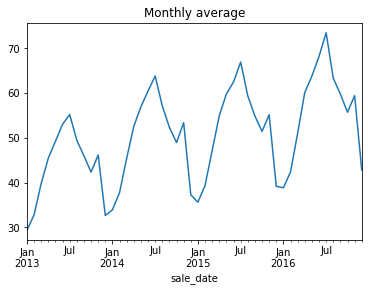

In [24]:
y.resample('M').mean().plot(title='Monthly average')

<AxesSubplot:title={'center':'2 week average'}, xlabel='sale_date'>

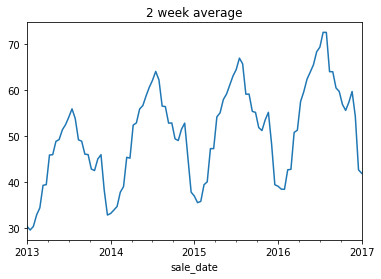

In [25]:
y.resample('2W').mean().plot(title='2 week average')

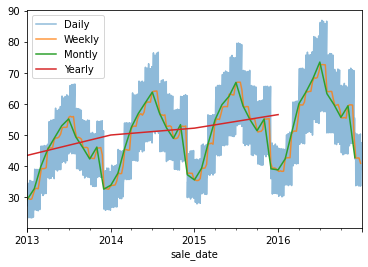

In [27]:
#y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

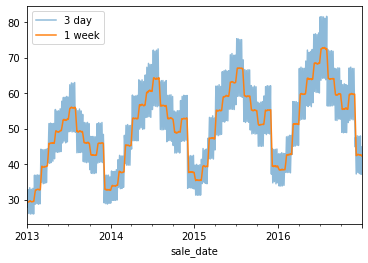

In [28]:
#y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

<AxesSubplot:title={'center':'Average week-to-week change in sales'}, xlabel='sale_date'>

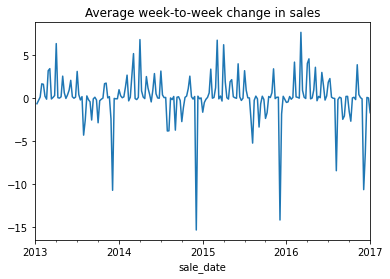

In [29]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in sales')

<AxesSubplot:title={'center':'Average month-to-month change in sales'}, xlabel='sale_date'>

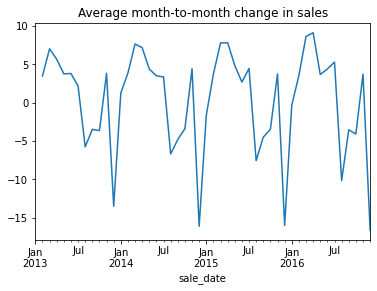

In [30]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in sales')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='sale_date'>

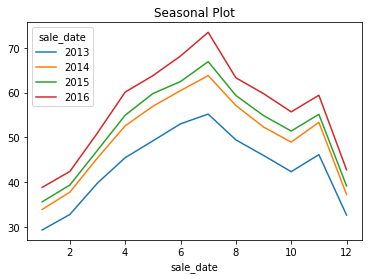

In [31]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

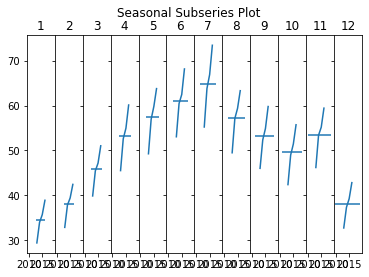

In [32]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

Text(0.5, 1.0, 'Lag plot with lag=1')

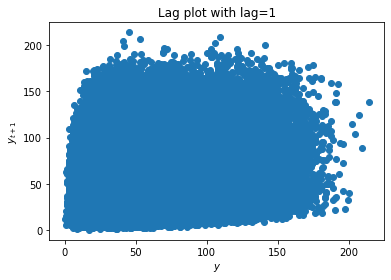

In [33]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

<ipython-input-36-8d6a580b29fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['y(t + 1)'] = train.sale_amount.shift(-1)


[Text(0.5, 0, 't'), Text(0, 0.5, 't + 1')]

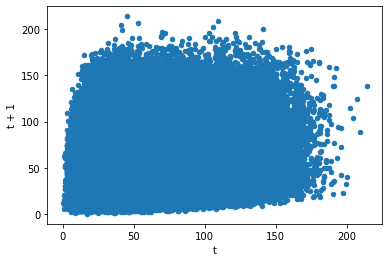

In [36]:
train['y(t + 1)'] = train.sale_amount.shift(-1)
ax = train.plot.scatter(x='sale_amount', y='y(t + 1)')
ax.set(xlabel='t', ylabel='t + 1')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

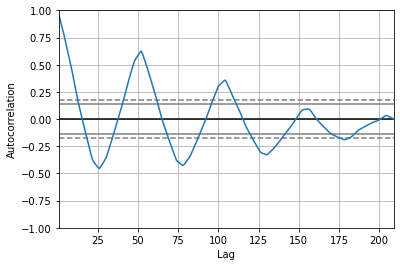

In [38]:
pd.plotting.autocorrelation_plot(train.sale_amount.resample('W').mean())

In [42]:
import statsmodels.api as sm

y = train.sale_amount.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06 00:00:00+00:00,30.355667,NaN,-14.406312,NaN
2013-01-13 00:00:00+00:00,29.686286,NaN,-14.747474,NaN
2013-01-20 00:00:00+00:00,29.414286,NaN,-14.840886,NaN
2013-01-27 00:00:00+00:00,29.513714,NaN,-14.931698,NaN
2013-02-03 00:00:00+00:00,31.150571,NaN,-14.412598,NaN


<AxesSubplot:xlabel='sale_date'>

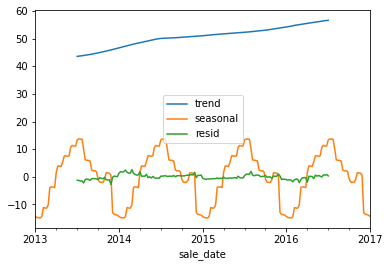

In [43]:
decomposition.iloc[:, 1:].plot()

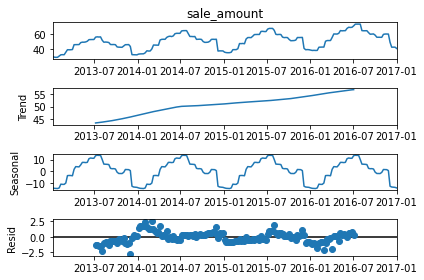

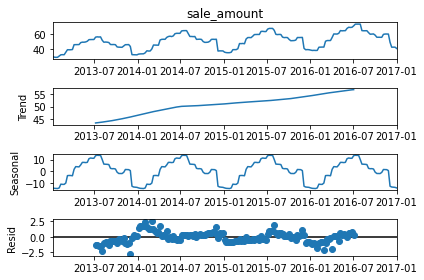

In [44]:
result.plot()

### OPD Germany Data Set

In [45]:
df_germany = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [46]:
df_germany.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [47]:
# Reassign the Date column to be a datetime type
df_germany.Date = pd.to_datetime(df_germany.Date)

In [48]:
#Set the index, and sort so we can ensure that its in chronological order.
df_germany = df_germany.set_index('Date').sort_index()

In [49]:
df_germany.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [51]:
# minimum date? maximum date?
# Is this correct?
df_germany.index.min(), df_germany.index.max()

(Timestamp('2006-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

### Train Test Split¶
- Test will be last year of data
- Train will be all data before last year of data

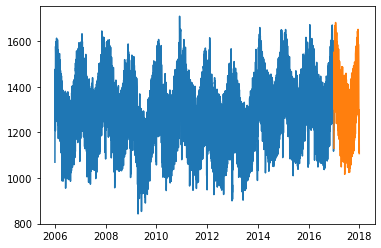

In [59]:
train = df_germany.loc[:'2016'] # includes 2015
test = df_germany.loc['2017']

plt.plot(train.index, train.Consumption)
plt.plot(test.index, test.Consumption)

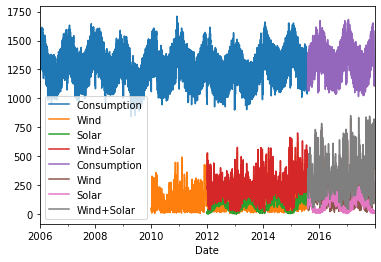

In [60]:
# Percentage
train_size = .80
test_size = .20

train_end_index = round(df_germany.shape[0] * train_size)
train = df_germany.iloc[:train_end_index]
test = df_germany.iloc[train_end_index:]

ax = train.plot(label='train')
test.plot(ax=ax, label='test')
plt.legend()

In [61]:
#For ease of use, renaming sale_amount to y
y = train.Consumption
y.head()

Date
2006-01-01    1069.184
2006-01-02    1380.521
2006-01-03    1442.533
2006-01-04    1457.217
2006-01-05    1477.131
Name: Consumption, dtype: float64

<AxesSubplot:ylabel='Frequency'>

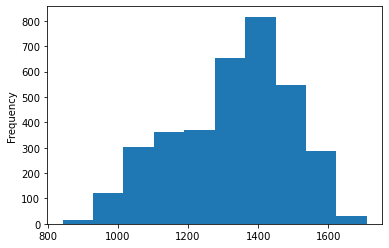

In [62]:
#histogram to show the distribution of our target variable
y.plot.hist()

[Text(0.5, 1.0, 'Average Consumption by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Consumption Amount')]

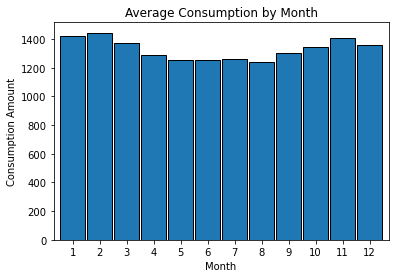

In [63]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Month', xlabel='Month', ylabel='Consumption Amount')

[Text(0.5, 1.0, 'Average Consumption by Weekday'),
 Text(0.5, 17.200000000000003, 'Weekday'),
 Text(17.200000000000003, 0.5, 'Consumption Amount')]

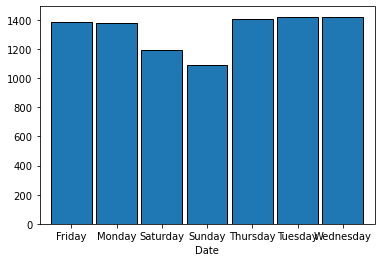

In [64]:
y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Weekday', xlabel='Weekday', ylabel='Consumption Amount')

<AxesSubplot:xlabel='Date'>

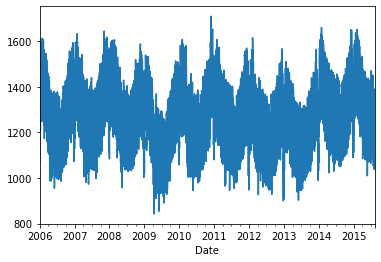

In [65]:
y.plot()

<AxesSubplot:title={'center':'Monthly average'}, xlabel='Date'>

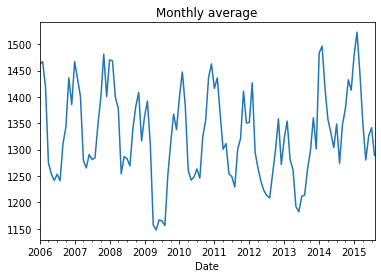

In [66]:
y.resample('M').mean().plot(title='Monthly average')

<AxesSubplot:title={'center':'2 week average'}, xlabel='Date'>

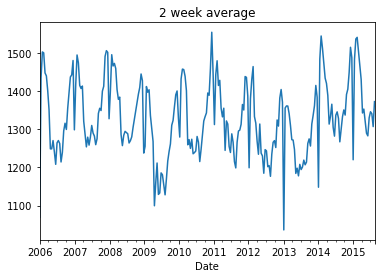

In [67]:
y.resample('2W').mean().plot(title='2 week average')

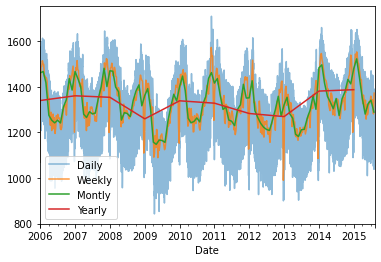

In [68]:
#y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

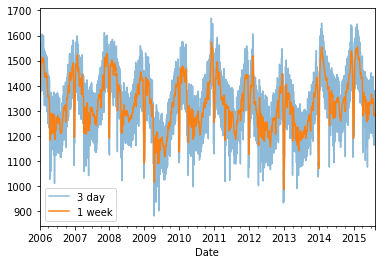

In [69]:
#y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()

<AxesSubplot:title={'center':'Average week-to-week change in consumption'}, xlabel='Date'>

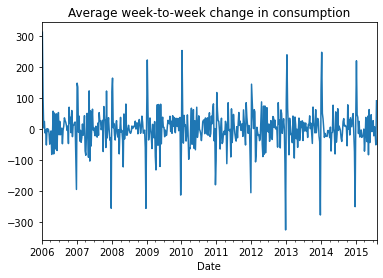

In [70]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in consumption')

<AxesSubplot:title={'center':'Average month-to-month change in consumption'}, xlabel='Date'>

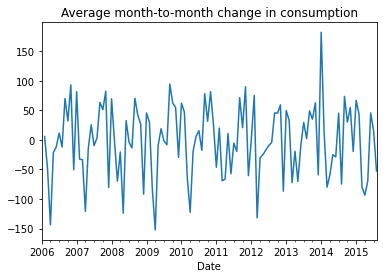

In [71]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in consumption')

<AxesSubplot:title={'center':'Seasonal Plot'}, xlabel='Date'>

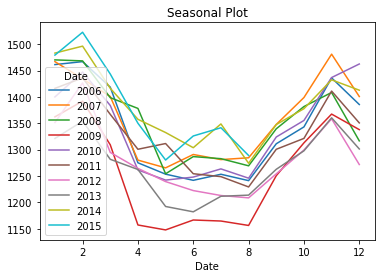

In [72]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

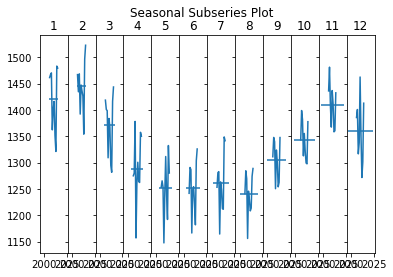

In [73]:
table = y.groupby([y.index.year, y.index.month]).mean().unstack()

fig, axs = plt.subplots(1, 12, sharey=True, sharex=True)
for ax, (month, subset) in zip(axs, table.iteritems()):
    subset.plot(ax=ax, title=month)
    ax.hlines(subset.mean(), *ax.get_xlim())
    ax.set(xlabel='')

fig.suptitle('Seasonal Subseries Plot') # super-title for the overall figure
fig.subplots_adjust(wspace=0)

Text(0.5, 1.0, 'Lag plot with lag=1')

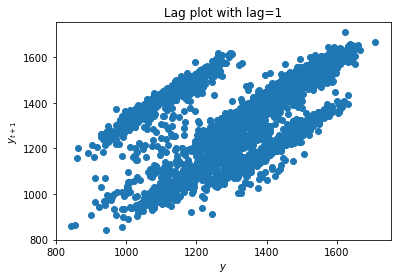

In [74]:
plt.scatter(y, y.shift(-1))
plt.xlabel('$y$')
plt.ylabel('$y_{t + 1}$')
plt.title('Lag plot with lag=1')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

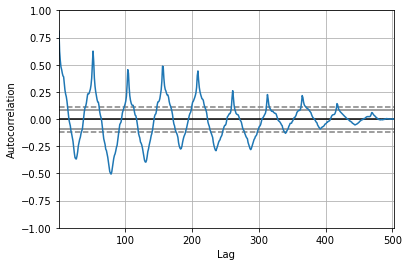

In [76]:
pd.plotting.autocorrelation_plot(train.Consumption.resample('W').mean())

In [77]:
import statsmodels.api as sm

y = train.Consumption.resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
Date,,,,
2006-01-01,1069.184000,NaN,-42.809359,NaN
2006-01-08,1381.300143,NaN,-146.409686,NaN
2006-01-15,1486.730286,NaN,-2.736513,NaN
2006-01-22,1490.031143,NaN,103.817819,NaN
2006-01-29,1514.176857,NaN,126.395454,NaN


<AxesSubplot:xlabel='Date'>

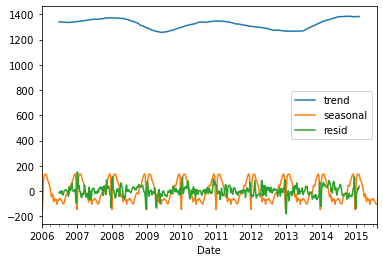

In [78]:
decomposition.iloc[:, 1:].plot()

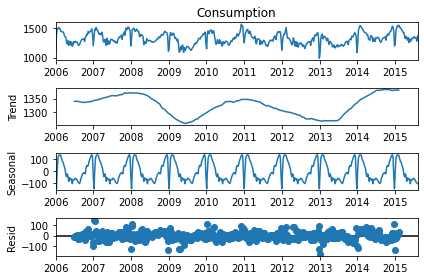

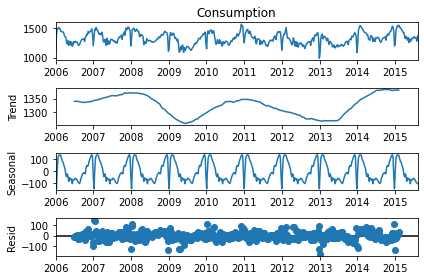

In [79]:
result.plot()